In [1]:
import json
import os
import dotenv
# os.environ['PATH_TO_ENV'] = "~/projects/chatsky-llm-autoconfig/.env"

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from dialogue2graph import metrics
from dialogue2graph.pipelines.core.graph import Graph
from dialogue2graph.pipelines.model_storage import ModelStorage
from dialogue2graph.pipelines.helpers.parse_data import PipelineRawDataType

/home/peshkichev/miniconda3/envs/py311/lib/python3.11/site-packages/pydantic/_internal/_fields.py:198: UserWarning: Field name "validate" in "Dialogue" shadows an attribute in parent "BaseModel"
  warnings.warn(


In [4]:
dotenv.load_dotenv()

True

In [5]:
ms = ModelStorage()

In [6]:
ms.add(
        key="grouping_llm",
        config={"name": "chatgpt-4o-latest", "temperature": 1},
        model_type="llm",
    )    
ms.add(
        key="extending_llm",
        config={"name": "chatgpt-4o-latest", "temperature": 0},
        model_type="llm",
    )    
ms.add(
        key="filling_llm",
        config={"name": "o3-mini", "temperature": 1},
        model_type="llm",
    )
ms.add(
        key="formatting_llm",
        config={"name": "gpt-4o-mini", "temperature": 0},
        model_type="llm",
    )
ms.add(
        key="sim_model",
        config={"model_name": "BAAI/bge-m3", "device": "cuda:0"},
        model_type="emb",
    )


INFO:dialogue2graph.pipelines.model_storage:Added llm model 'grouping_llm' to storage


INFO:dialogue2graph.pipelines.model_storage:Added llm model 'extending_llm' to storage
INFO:dialogue2graph.pipelines.model_storage:Added llm model 'filling_llm' to storage
INFO:dialogue2graph.pipelines.model_storage:Added llm model 'formatting_llm' to storage
/data/home/peshkichev/projects/chatsky-llm-autoconfig/dialogue2graph/pipelines/model_storage.py:131: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  model_instance = HuggingFaceEmbeddings(**config)
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-m3
INFO:dialogue2graph.pipelines.model_storage:Added emb model 'sim_model' to storage


### D2G Algo pipeline

In [7]:
from dialogue2graph.pipelines.d2g_light.pipeline import Pipeline

/home/peshkichev/miniconda3/envs/py311/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:623: UserWarning: <built-in function callable> is not a Python type (it may be an instance of an object), Pydantic will allow any object with no validation since we cannot even enforce that the input is an instance of the given type. To get rid of this error wrap the type with `pydantic.SkipValidation`.
  warn(


In [15]:
pipeline = Pipeline(
        name="d2g_light",
        model_storage=ms,
        filling_llm="filling_llm",
        formatting_llm="formatting_llm",
        sim_model="sim_model",
        step2_evals=metrics.DGEvalBase,
        end_evals=metrics.DGEvalBase
        )

INFO:chromadb.telemetry.product.posthog:Anonymized telemetry enabled. See                     https://docs.trychroma.com/telemetry for more information.


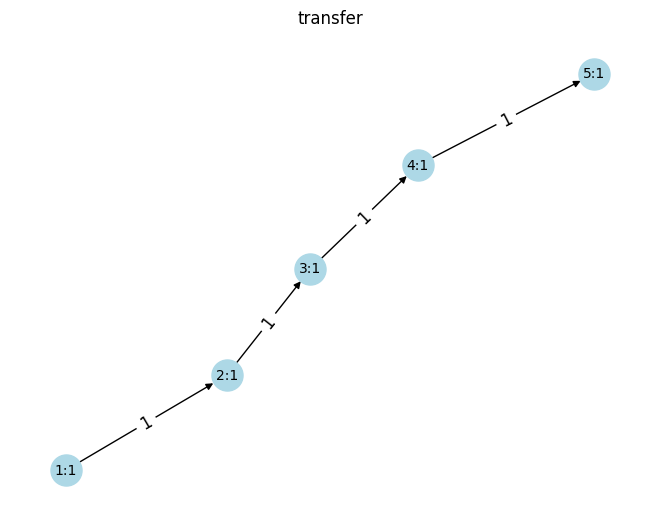

In [9]:
data = [{'text': 'Hey there! How can I help you today?',
    'participant': 'assistant'},
   {'text': 'I need to book a ride to the airport.', 'participant': 'user'},
   {'text': 'Sure! I can help with that. When is your flight, and where are you departing from?',
    'participant': 'assistant'},
   {'text': 'Do you have any other options?', 'participant': 'user'},
   {'text': "If you'd prefer, I can send you options for ride-share services instead. Would you like that?",
    'participant': 'assistant'},
   {'text': "No, I'll manage on my own.", 'participant': 'user'},
   {'text': 'No worries! Feel free to reach out anytime.',
    'participant': 'assistant'},
   {'text': 'Alright, thanks anyway.', 'participant': 'user'},
   {'text': "You're welcome! Have a fantastic trip!",
    'participant': 'assistant'}]
raw_data = PipelineRawDataType(dialogs=data)
graph, report = pipeline.invoke(raw_data)
graph.visualise_short("transfer")

In [8]:
report

PipelineReport(service='d2g_light', properties={'time': 0.3511824607849121}, step_reports=[{}])

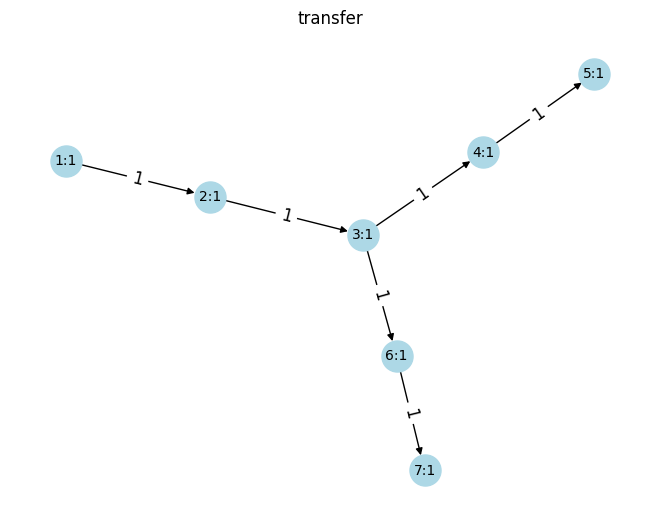

In [10]:
data = [[{'text': 'Hey there! How can I help you today?',
    'participant': 'assistant'},
   {'text': 'I need to book a ride to the airport.', 'participant': 'user'},
   {'text': 'Sure! I can help with that. When is your flight, and where are you departing from?',
    'participant': 'assistant'},
   {'text': 'Do you have any other options?', 'participant': 'user'},
   {'text': "If you'd prefer, I can send you options for ride-share services instead. Would you like that?",
    'participant': 'assistant'},
   {'text': 'Actually, never mind.', 'participant': 'user'},
   {'text': 'Alright, let me know if you need help later. Have a great day!',
    'participant': 'assistant'},
   {'text': 'Okay, have a great day!', 'participant': 'user'},
   {'text': 'Glad to help! Safe travels.', 'participant': 'assistant'}],
   [{'text': 'Hey there! How can I help you today?',
    'participant': 'assistant'},
   {'text': 'I need to book a ride to the airport.', 'participant': 'user'},
   {'text': 'Sure! I can help with that. When is your flight, and where are you departing from?',
    'participant': 'assistant'},
   {'text': 'Do you have any other options?', 'participant': 'user'},
   {'text': "If you'd prefer, I can send you options for ride-share services instead. Would you like that?",
    'participant': 'assistant'},
   {'text': "No, I'll manage on my own.", 'participant': 'user'},
   {'text': 'No worries! Feel free to reach out anytime.',
    'participant': 'assistant'},
   {'text': 'Alright, thanks anyway.', 'participant': 'user'},
   {'text': "You're welcome! Have a fantastic trip!",
    'participant': 'assistant'}]]
raw_data = PipelineRawDataType(dialogs=data)
graph, report = pipeline.invoke(raw_data)
graph.visualise_short("transfer")

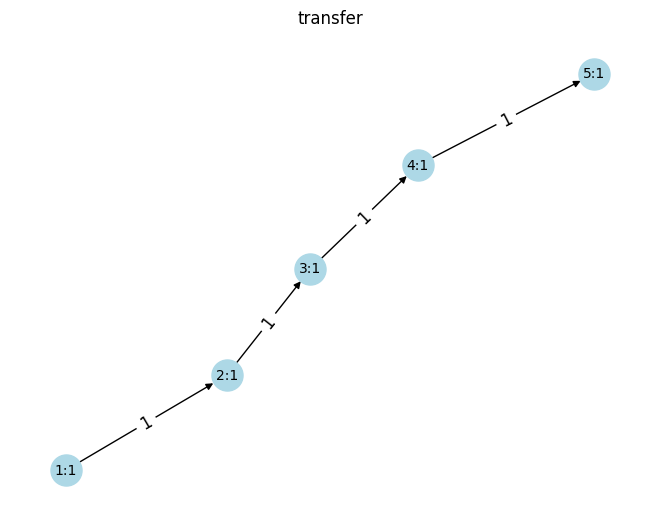

In [11]:
data = [{"messages": [{'text': 'Hey there! How can I help you today?',
    'participant': 'assistant'},
   {'text': 'I need to book a ride to the airport.', 'participant': 'user'},
   {'text': 'Sure! I can help with that. When is your flight, and where are you departing from?',
    'participant': 'assistant'},
   {'text': 'Do you have any other options?', 'participant': 'user'},
   {'text': "If you'd prefer, I can send you options for ride-share services instead. Would you like that?",
    'participant': 'assistant'},
   {'text': "No, I'll manage on my own.", 'participant': 'user'},
   {'text': 'No worries! Feel free to reach out anytime.',
    'participant': 'assistant'},
   {'text': 'Alright, thanks anyway.', 'participant': 'user'},
   {'text': "You're welcome! Have a fantastic trip!",
    'participant': 'assistant'}]}]
raw_data = PipelineRawDataType(dialogs=data)
graph, report = pipeline.invoke(raw_data)
graph.visualise_short("transfer")

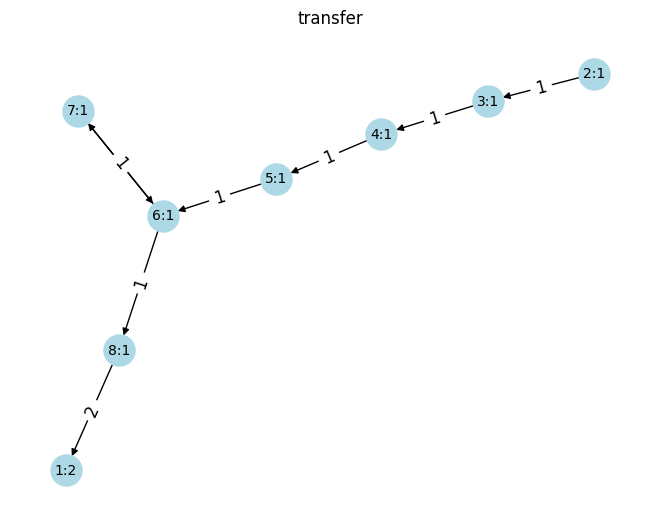

In [12]:
with open('transfer.json') as f:
    data = json.load(f)

raw_data = PipelineRawDataType(dialogs=data)
graph, report = pipeline.invoke(raw_data)
graph.visualise_short("transfer")

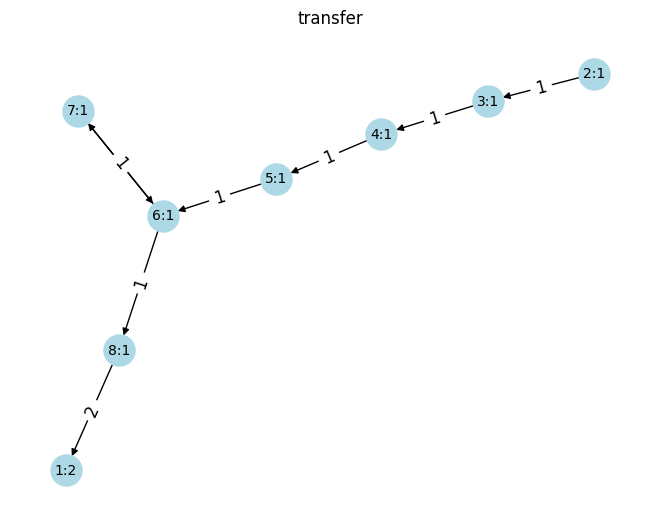

In [19]:
raw_data = PipelineRawDataType(dialogs="transfer.json")
graph, report = pipeline.invoke(raw_data)
graph.visualise_short("transfer")

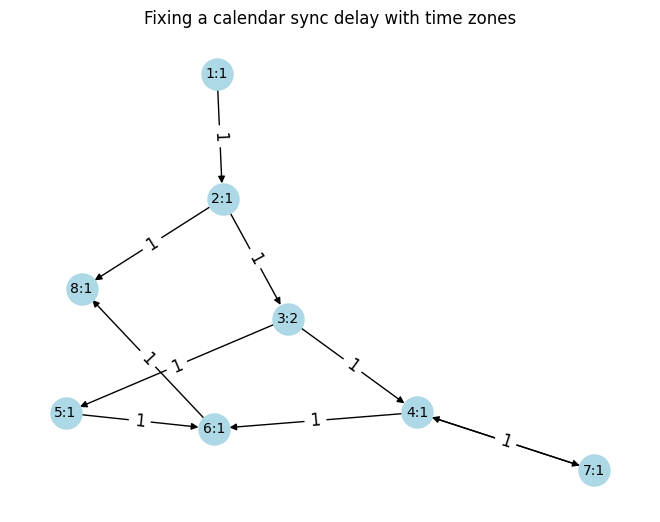

In [22]:
with open("test_graph_1.json", encoding="utf-8") as f:
    data = json.load(f)
Graph(data['true_graph']).visualise_short("Fixing a calendar sync delay with time zones")

In [28]:
data[0]['graph']

{'edges': [{'source': 1,
   'target': 2,
   'utterances': ["I'm having trouble with my calendar not syncing properly."]},
  {'source': 2,
   'target': 3,
   'utterances': ["Yes, I checked but it still doesn't sync."]},
  {'source': 3,
   'target': 4,
   'utterances': ['Alright, please guide me through the steps.']},
  {'source': 4,
   'target': 6,
   'utterances': ["I've followed the steps and it seems to be working now."]},
  {'source': 2,
   'target': 8,
   'utterances': ["I think I'll handle it later. Thanks anyway."]},
  {'source': 4,
   'target': 7,
   'utterances': ['I want to change the time zone instead.']},
  {'source': 7,
   'target': 4,
   'utterances': ["Sure, let's adjust the time zone settings."]},
  {'source': 5,
   'target': 6,
   'utterances': ["After adjusting, it still doesn't sync."]},
  {'source': 3,
   'target': 5,
   'utterances': ['Time zone settings are correct, but the issue persists.']},
  {'source': 6,
   'target': 8,
   'utterances': ["Actually, it's still 

In [23]:
raw_data = PipelineRawDataType(dialogs=data['dialogs'], true_graph=data['true_graph'])
graph, report = pipeline.invoke(raw_data, enable_evals=True)
report

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-m3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

GRAPH:  {'nodes': [{'id': 1, 'label': '', 'is_start': False, 'utterances': ['Could you verify that the time zone settings are properly configured on your devices?', 'Have you checked if your time zone settings are correct on all your devices?']}, {'id': 2, 'label': '', 'is_start': True, 'utterances': ['Hello! How can I assist you with your calendar today?']}, {'id': 3, 'label': '', 'is_start': False, 'utterances': ["I'm sorry to hear you're experiencing a sync delay. Can you tell me more about the issue?"]}, {'id': 4, 'label': '', 'is_start': False, 'utterances': ['Sure, let me guide you through adjusting your time zone settings.']}, {'id': 5, 'label': '', 'is_start': False, 'utterances': ['Of course! Which device would you like to adjust the time zone settings on?']}, {'id': 6, 'label': '', 'is_start': False, 'utterances': ['Great! Is your calendar syncing correctly now?']}, {'id': 7, 'label': '', 'is_start': False, 'utterances': ["I'm sorry we couldn't resolve the issue. If you need 

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

PipelineReport(service='d2g_light', properties={'time': 8.666953563690186, 'simple_graph_comparison': True, 'complex_graph_comparison': {'value': True, 'description': 'Nodes similarity: 0.9999998807907104, Nodes+edges similarity: 0.9870117902755737'}}, step_reports=[{'compare_graphs:step2': {'value': True, 'description': 'Nodes similarity: 0.9999998807907104, Nodes+edges similarity: 0.9870117902755737'}, 'is_same_structure:step2': True}])

### D2G LLM pipeline

In [24]:
from dialogue2graph.pipelines.d2g_llm.pipeline import Pipeline
pipeline = Pipeline(
        name="d2g_llm",
        model_storage=ms,
        grouping_llm="grouping_llm",
        filling_llm="filling_llm",
        formatting_llm="formatting_llm",
        sim_model="sim_model",
        step2_evals=metrics.DGEvalBase,
        end_evals=metrics.DGEvalBase
        )

/home/peshkichev/miniconda3/envs/py311/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:623: UserWarning: <built-in function callable> is not a Python type (it may be an instance of an object), Pydantic will allow any object with no validation since we cannot even enforce that the input is an instance of the given type. To get rid of this error wrap the type with `pydantic.SkipValidation`.
  warn(


DIALGS:  [Dialogue(messages=[DialogueMessage(text='Hey there! How can I help you today?', participant='assistant'), DialogueMessage(text='I need to book a ride to the airport.', participant='user'), DialogueMessage(text='Sure! I can help with that. When is your flight, and where are you departing from?', participant='assistant'), DialogueMessage(text='Do you have any other options?', participant='user'), DialogueMessage(text="If you'd prefer, I can send you options for ride-share services instead. Would you like that?", participant='assistant'), DialogueMessage(text="No, I'll manage on my own.", participant='user'), DialogueMessage(text='No worries! Feel free to reach out anytime.', participant='assistant'), DialogueMessage(text='Alright, thanks anyway.', participant='user'), DialogueMessage(text="You're welcome! Have a fantastic trip!", participant='assistant')], id='d947e548-1130-11f0-85b4-ac1f6b2cd8f6', topic='', validate=True)]


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"


NODES:  [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hey there! How can I help you today?']}, {'id': 2, 'label': 'ask_ride_details', 'is_start': False, 'utterances': ['Sure! I can help with that. When is your flight, and where are you departing from?']}, {'id': 3, 'label': 'offer_alternative', 'is_start': False, 'utterances': ["If you'd prefer, I can send you options for ride-share services instead. Would you like that?"]}, {'id': 4, 'label': 'no_preferred_option', 'is_start': False, 'utterances': ['No worries! Feel free to reach out anytime.']}, {'id': 5, 'label': 'thanks', 'is_start': False, 'utterances': ['Alright, thanks anyway.']}, {'id': 6, 'label': 'farewell', 'is_start': False, 'utterances': ["You're welcome! Have a fantastic trip!"]}]


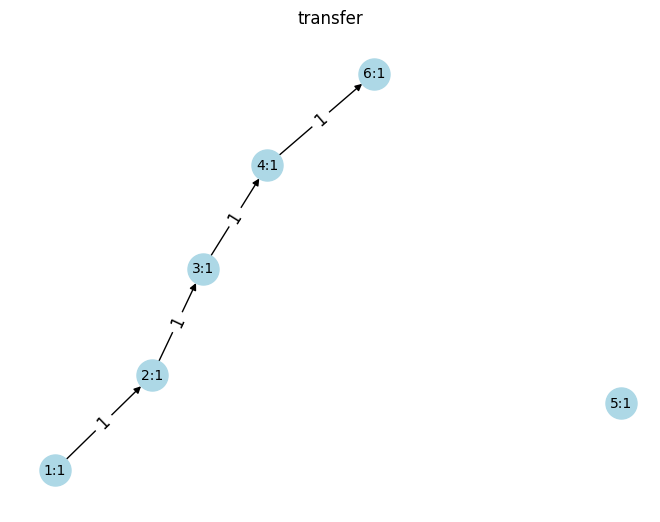

In [25]:
data = [{'text': 'Hey there! How can I help you today?',
    'participant': 'assistant'},
   {'text': 'I need to book a ride to the airport.', 'participant': 'user'},
   {'text': 'Sure! I can help with that. When is your flight, and where are you departing from?',
    'participant': 'assistant'},
   {'text': 'Do you have any other options?', 'participant': 'user'},
   {'text': "If you'd prefer, I can send you options for ride-share services instead. Would you like that?",
    'participant': 'assistant'},
   {'text': "No, I'll manage on my own.", 'participant': 'user'},
   {'text': 'No worries! Feel free to reach out anytime.',
    'participant': 'assistant'},
   {'text': 'Alright, thanks anyway.', 'participant': 'user'},
   {'text': "You're welcome! Have a fantastic trip!",
    'participant': 'assistant'}]
raw_data = PipelineRawDataType(dialogs=data)
graph, report = pipeline.invoke(raw_data)
graph.visualise_short("transfer")

In [ ]:
data = [[{'text': 'Hey there! How can I help you today?',
    'participant': 'assistant'},
   {'text': 'I need to book a ride to the airport.', 'participant': 'user'},
   {'text': 'Sure! I can help with that. When is your flight, and where are you departing from?',
    'participant': 'assistant'},
   {'text': 'Do you have any other options?', 'participant': 'user'},
   {'text': "If you'd prefer, I can send you options for ride-share services instead. Would you like that?",
    'participant': 'assistant'},
   {'text': 'Actually, never mind.', 'participant': 'user'},
   {'text': 'Alright, let me know if you need help later. Have a great day!',
    'participant': 'assistant'},
   {'text': 'Okay, have a great day!', 'participant': 'user'},
   {'text': 'Glad to help! Safe travels.', 'participant': 'assistant'}],
   [{'text': 'Hey there! How can I help you today?',
    'participant': 'assistant'},
   {'text': 'I need to book a ride to the airport.', 'participant': 'user'},
   {'text': 'Sure! I can help with that. When is your flight, and where are you departing from?',
    'participant': 'assistant'},
   {'text': 'Do you have any other options?', 'participant': 'user'},
   {'text': "If you'd prefer, I can send you options for ride-share services instead. Would you like that?",
    'participant': 'assistant'},
   {'text': "No, I'll manage on my own.", 'participant': 'user'},
   {'text': 'No worries! Feel free to reach out anytime.',
    'participant': 'assistant'},
   {'text': 'Alright, thanks anyway.', 'participant': 'user'},
   {'text': "You're welcome! Have a fantastic trip!",
    'participant': 'assistant'}]]
graph = pipeline.invoke(data)
graph.visualise_short("transfer")

In [ ]:
data = [{"messages": [{'text': 'Hey there! How can I help you today?',
    'participant': 'assistant'},
   {'text': 'I need to book a ride to the airport.', 'participant': 'user'},
   {'text': 'Sure! I can help with that. When is your flight, and where are you departing from?',
    'participant': 'assistant'},
   {'text': 'Do you have any other options?', 'participant': 'user'},
   {'text': "If you'd prefer, I can send you options for ride-share services instead. Would you like that?",
    'participant': 'assistant'},
   {'text': "No, I'll manage on my own.", 'participant': 'user'},
   {'text': 'No worries! Feel free to reach out anytime.',
    'participant': 'assistant'},
   {'text': 'Alright, thanks anyway.', 'participant': 'user'},
   {'text': "You're welcome! Have a fantastic trip!",
    'participant': 'assistant'}]}]
graph = pipeline.invoke(data)
graph.visualise_short("transfer")

In [29]:
data

[{'messages': [{'text': 'Hey there! How can I help you today?',
    'participant': 'assistant'},
   {'text': 'I need to book a ride to the airport.', 'participant': 'user'},
   {'text': 'Sure! I can help with that. When is your flight, and where are you departing from?',
    'participant': 'assistant'},
   {'text': 'My flight is on Saturday at 10 AM from JFK.',
    'participant': 'user'},
   {'text': 'Got it. Where should the driver pick you up?',
    'participant': 'assistant'},
   {'text': 'Pickup is from my home in Brooklyn.', 'participant': 'user'},
   {'text': 'Thanks! How many passengers will be traveling?',
    'participant': 'assistant'},
   {'text': "It's just me traveling.", 'participant': 'user'},
   {'text': 'Alright! Do you have any preference for the type of vehicle? We have sedans, SUVs, and vans available.',
    'participant': 'assistant'},
   {'text': 'Actually, can I change my vehicle type?', 'participant': 'user'},
   {'text': 'Of course! What type of vehicle would y

In [30]:
with open('transfer.json') as f:
    data = json.load(f)
raw_data = PipelineRawDataType(dialogs=data)
graph, report = pipeline.invoke(raw_data)
graph.visualise_short("transfer")

DIALGS:  [Dialogue(messages=[DialogueMessage(text='Hey there! How can I help you today?', participant='assistant'), DialogueMessage(text='I need to book a ride to the airport.', participant='user'), DialogueMessage(text='Sure! I can help with that. When is your flight, and where are you departing from?', participant='assistant'), DialogueMessage(text='My flight is on Saturday at 10 AM from JFK.', participant='user'), DialogueMessage(text='Got it. Where should the driver pick you up?', participant='assistant'), DialogueMessage(text='Pickup is from my home in Brooklyn.', participant='user'), DialogueMessage(text='Thanks! How many passengers will be traveling?', participant='assistant'), DialogueMessage(text="It's just me traveling.", participant='user'), DialogueMessage(text='Alright! Do you have any preference for the type of vehicle? We have sedans, SUVs, and vans available.', participant='assistant'), DialogueMessage(text='Actually, can I change my vehicle type?', participant='user'),

INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"


NODES:  [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hey there! How can I help you today?']}, {'id': 2, 'label': 'book_ride', 'is_start': False, 'utterances': ['Sure! I can help with that. When is your flight, and where are you departing from?', 'Got it. Where should the driver pick you up?', 'Thanks! How many passengers will be traveling?', 'Alright! Do you have any preference for the type of vehicle? We have sedans, SUVs, and vans available.', 'Alright! Do you have any preference for the type of vehicle? We have sedans, SUVs, and vans available.', 'All set! Your driver will arrive on time. Let me know if you need anything else.']}, {'id': 3, 'label': 'change_vehicle', 'is_start': False, 'utterances': ['Actually, can I change my vehicle type?', 'Of course! What type of vehicle would you prefer instead?']}, {'id': 4, 'label': 'confirm_vehicle', 'is_start': False, 'utterances': ['On second thought, my original choice is fine.', 'A sedan would be fine.']}, {'id': 5, 'la

ERROR:dialogue2graph.pipelines.d2g_llm.three_stages_llm:Error in step3: None cannot be a node


AttributeError: 'NoneType' object has no attribute 'is_directed'

In [ ]:
graph = pipeline.invoke("transfer.json")
graph.visualise_short("transfer")

In [31]:
with open("test_graph_1.json", encoding="utf-8") as f:
    data = json.load(f)
raw_data = PipelineRawDataType(dialogs=data['dialogs'], true_graph=data['true_graph'])
graph, report = pipeline.invoke(raw_data, enable_evals=True)
report

DIALGS:  [Dialogue(messages=[DialogueMessage(text='Hello! How can I assist you with your calendar today?', participant='assistant'), DialogueMessage(text="I'm having trouble with my calendar not syncing properly.", participant='user'), DialogueMessage(text="I'm sorry to hear you're experiencing a sync delay. Can you tell me more about the issue?", participant='assistant'), DialogueMessage(text="Yes, I checked but it still doesn't sync.", participant='user'), DialogueMessage(text='Could you verify that the time zone settings are properly configured on your devices?', participant='assistant'), DialogueMessage(text='Alright, please guide me through the steps.', participant='user'), DialogueMessage(text='Sure, let me guide you through adjusting your time zone settings.', participant='assistant'), DialogueMessage(text='I want to change the time zone instead.', participant='user'), DialogueMessage(text='Of course! Which device would you like to adjust the time zone settings on?', participant

INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"


NODES:  [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hello! How can I assist you with your calendar today?']}, {'id': 2, 'label': 'ask_syncing_issue', 'is_start': False, 'utterances': ["I'm having trouble with my calendar not syncing properly."]}, {'id': 3, 'label': 'ask_more_info', 'is_start': False, 'utterances': ["I'm sorry to hear you're experiencing a sync delay. Can you tell me more about the issue?"]}, {'id': 4, 'label': 'guide_user_timezone', 'is_start': False, 'utterances': ['Alright, please guide me through the steps.']}, {'id': 5, 'label': 'verify_timezone_settings', 'is_start': False, 'utterances': ['Could you verify that the time zone settings are properly configured on your devices?']}, {'id': 6, 'label': 'adjust_timezone_settings', 'is_start': False, 'utterances': ['Sure, let me guide you through adjusting your time zone settings.']}, {'id': 7, 'label': 'change_timezone_device', 'is_start': False, 'utterances': ['Of course! Which device would you like t

ERROR:dialogue2graph.pipelines.d2g_llm.three_stages_llm:Error in step3: None cannot be a node


GRAPH:  {}


KeyError: 'edges'

### D2G LLM extender

In [32]:
from dialogue2graph.pipelines.d2g_extender.pipeline import Pipeline
pipeline = Pipeline(
        name="d2g_ext",
        model_storage=ms,
        extending_llm="extending_llm",
        filling_llm="filling_llm",
        formatting_llm="formatting_llm",
        sim_model="sim_model",
        step1_evals=metrics.PreDGEvalBase,
        extender_evals=metrics.PreDGEvalBase,
        step2_evals=metrics.DGEvalBase,
        end_evals=metrics.DGEvalBase
        )

/home/peshkichev/miniconda3/envs/py311/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:623: UserWarning: <built-in function callable> is not a Python type (it may be an instance of an object), Pydantic will allow any object with no validation since we cannot even enforce that the input is an instance of the given type. To get rid of this error wrap the type with `pydantic.SkipValidation`.
  warn(


In [6]:
raw_data

PipelineRawDataType(dialogs=[{'text': 'Hey there! How can I help you today?', 'participant': 'assistant'}, {'text': 'I need to book a ride to the airport.', 'participant': 'user'}, {'text': 'Sure! I can help with that. When is your flight, and where are you departing from?', 'participant': 'assistant'}, {'text': 'Do you have any other options?', 'participant': 'user'}, {'text': "If you'd prefer, I can send you options for ride-share services instead. Would you like that?", 'participant': 'assistant'}, {'text': "No, I'll manage on my own.", 'participant': 'user'}, {'text': 'No worries! Feel free to reach out anytime.', 'participant': 'assistant'}, {'text': 'Alright, thanks anyway.', 'participant': 'user'}, {'text': "You're welcome! Have a fantastic trip!", 'participant': 'assistant'}], supported_graph=None, true_graph=None)

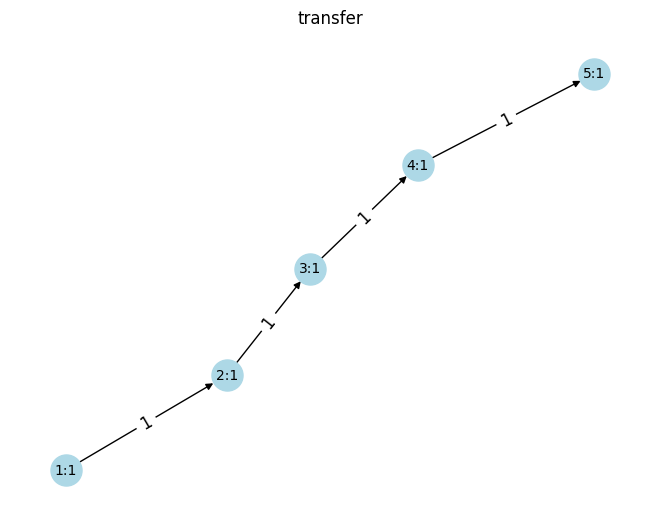

In [33]:
data = [{'text': 'Hey there! How can I help you today?',
    'participant': 'assistant'},
   {'text': 'I need to book a ride to the airport.', 'participant': 'user'},
   {'text': 'Sure! I can help with that. When is your flight, and where are you departing from?',
    'participant': 'assistant'},
   {'text': 'Do you have any other options?', 'participant': 'user'},
   {'text': "If you'd prefer, I can send you options for ride-share services instead. Would you like that?",
    'participant': 'assistant'},
   {'text': "No, I'll manage on my own.", 'participant': 'user'},
   {'text': 'No worries! Feel free to reach out anytime.',
    'participant': 'assistant'},
   {'text': 'Alright, thanks anyway.', 'participant': 'user'},
   {'text': "You're welcome! Have a fantastic trip!",
    'participant': 'assistant'}]
raw_data = PipelineRawDataType(dialogs=data)
graph, report = pipeline.invoke(raw_data)
graph.visualise_short("transfer")

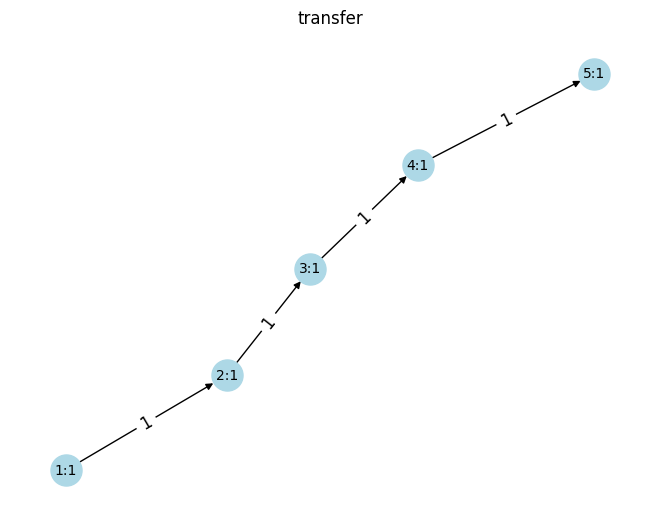

In [34]:
data = [[{'text': 'Hey there! How can I help you today?',
    'participant': 'assistant'},
   {'text': 'I need to book a ride to the airport.', 'participant': 'user'},
   {'text': 'Sure! I can help with that. When is your flight, and where are you departing from?',
    'participant': 'assistant'},
   {'text': 'Do you have any other options?', 'participant': 'user'},
   {'text': "If you'd prefer, I can send you options for ride-share services instead. Would you like that?",
    'participant': 'assistant'},
   {'text': 'Actually, never mind.', 'participant': 'user'},
   {'text': 'Alright, let me know if you need help later. Have a great day!',
    'participant': 'assistant'},
   {'text': 'Okay, have a great day!', 'participant': 'user'},
   {'text': 'Glad to help! Safe travels.', 'participant': 'assistant'}]]
raw_data = PipelineRawDataType(dialogs=data, supported_graph=graph.graph_dict)
graph, report = pipeline.invoke(raw_data)
graph.visualise_short("transfer")

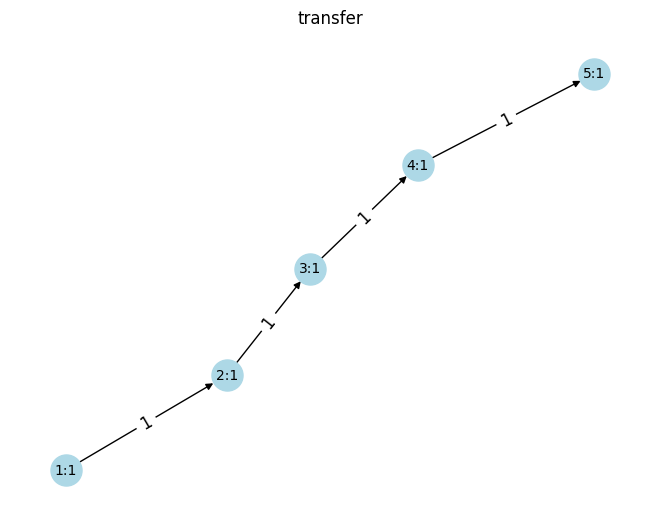

In [35]:
data = [{"messages": [{'text': 'Hey there! How can I help you today?',
    'participant': 'assistant'},
   {'text': 'I need to book a ride to the airport.', 'participant': 'user'},
   {'text': 'Sure! I can help with that. When is your flight, and where are you departing from?',
    'participant': 'assistant'},
   {'text': 'Do you have any other options?', 'participant': 'user'},
   {'text': "If you'd prefer, I can send you options for ride-share services instead. Would you like that?",
    'participant': 'assistant'},
   {'text': "No, I'll manage on my own.", 'participant': 'user'},
   {'text': 'No worries! Feel free to reach out anytime.',
    'participant': 'assistant'},
   {'text': 'Alright, thanks anyway.', 'participant': 'user'},
   {'text': "You're welcome! Have a fantastic trip!",
    'participant': 'assistant'}]}]
raw_data = PipelineRawDataType(dialogs=data)
graph, report = pipeline.invoke(raw_data)
graph.visualise_short("transfer")

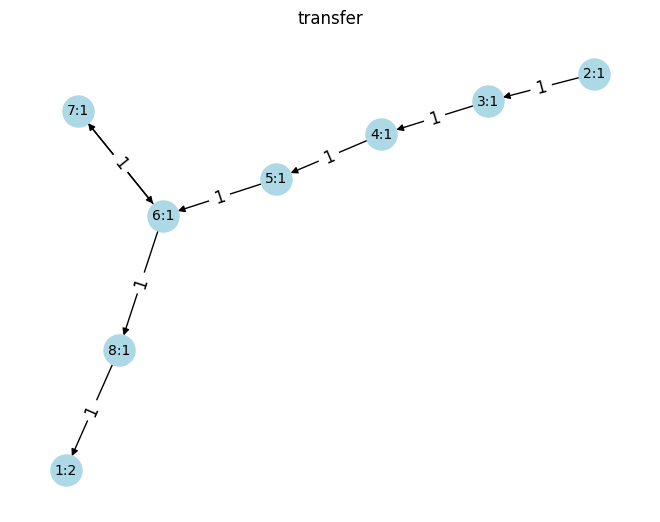

In [36]:
with open('transfer.json') as f:
    data = json.load(f)
raw_data = PipelineRawDataType(dialogs=data)
graph, report = pipeline.invoke(raw_data)
graph.visualise_short("transfer")

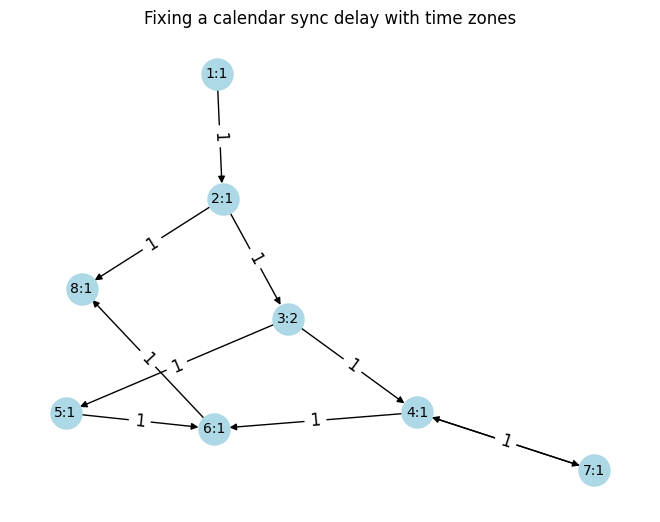

In [38]:
with open("test_graph_1.json", encoding="utf-8") as f:
    data = json.load(f)
Graph(data['true_graph']).visualise_short("Fixing a calendar sync delay with time zones")

In [48]:
data

[{'graph': {'edges': [{'source': 1,
     'target': 2,
     'utterances': ["I'm having trouble with my calendar not syncing properly."]},
    {'source': 2,
     'target': 3,
     'utterances': ["Yes, I checked but it still doesn't sync."]},
    {'source': 3,
     'target': 4,
     'utterances': ['Alright, please guide me through the steps.']},
    {'source': 4,
     'target': 6,
     'utterances': ["I've followed the steps and it seems to be working now."]},
    {'source': 2,
     'target': 8,
     'utterances': ["I think I'll handle it later. Thanks anyway."]},
    {'source': 4,
     'target': 7,
     'utterances': ['I want to change the time zone instead.']},
    {'source': 7,
     'target': 4,
     'utterances': ["Sure, let's adjust the time zone settings."]},
    {'source': 5,
     'target': 6,
     'utterances': ["After adjusting, it still doesn't sync."]},
    {'source': 3,
     'target': 5,
     'utterances': ['Time zone settings are correct, but the issue persists.']},
    {'sou

In [39]:
raw_data = PipelineRawDataType(dialogs=data['dialogs'], true_graph=data['true_graph'])
graph, report = pipeline.invoke(raw_data, enable_evals=True)
report

INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"


Graph has all the dialogues
GRAPH:  {'edges': [{'source': 1, 'target': 4, 'utterances': ['alright, please guide me through the steps.']}, {'source': 2, 'target': 3, 'utterances': ["i'm having trouble with my calendar not syncing properly."]}, {'source': 3, 'target': 1, 'utterances': ["yes, i checked but it still doesn't sync."]}, {'source': 4, 'target': 5, 'utterances': ['i want to change the time zone instead.']}, {'source': 5, 'target': 4, 'utterances': ["sure, let's adjust the time zone settings."]}, {'source': 4, 'target': 6, 'utterances': ["i've followed the steps and it seems to be working now."]}, {'source': 6, 'target': 7, 'utterances': ["actually, it's still not syncing. i want to try something else."]}, {'source': 1, 'target': 3, 'utterances': ['time zone settings are correct, but the issue persists.']}, {'source': 3, 'target': 6, 'utterances': ["after adjusting, it still doesn't sync."]}], 'nodes': [{'id': 1, 'label': '', 'is_start': False, 'utterances': ['Time zone settings

PipelineReport(service='d2g_ext', properties={'time': 14.081799983978271, 'simple_graph_comparison': False, 'complex_graph_comparison': {'value': False, 'description': 'Numbers of nodes do not match: 7 != 8'}}, step_reports=[{'d2g_light:compare_graphs:step2': {'value': False, 'description': 'Numbers of nodes do not match: 7 != 8'}, 'd2g_light:is_same_structure:step2': False, 'is_same_structure:step1': False, 'is_same_structure:extender': False, 'compare_graphs:step2': {'value': False, 'description': 'Numbers of nodes do not match: 7 != 8'}, 'is_same_structure:step2': False}])

In [33]:
report.properties['complex_graph_comparison']

{'value': False, 'description': 'Numbers of nodes do not match: 7 != 8'}

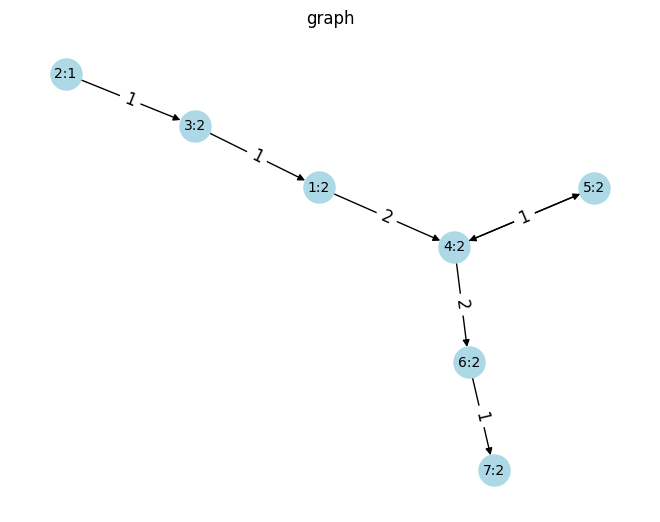

In [34]:
graph.visualise_short("graph")

In [ ]:
Graph(data[0]['graph']).visualise_short("graph")

In [ ]:
pipeline.invoke(data[0]['dialogues'], Graph(data[0]['graph']))